# Analysing uber data for New York City from January, 2015 to June, 2015

In [90]:
# %matplotlib notebook

In [6]:
# Dependencies

import numpy as np
import pandas as pd
from scipy.stats import linregress
from scipy import stats
from matplotlib import pyplot as plt


# Importing data created in clean_Uber_data.ipynb and saved in Resources folder


In [7]:
uber_data=pd.read_pickle('../Resources/uber_weather_df1.pkl')
uber_data.head()

,locationID,Ride_Date,year,month,day,hour,Weekday_Name,Year,Month,Average Temperature (F),Average Humidity,"Average Pressure (""Hg)"
0,255,2015-01-01 00:00:05,2015,Jan,1,0,Thursday,2015,Jan,30,0.54,30.1
1,144,2015-01-01 00:00:05,2015,Jan,1,0,Thursday,2015,Jan,30,0.54,30.1
2,113,2015-01-01 00:00:08,2015,Jan,1,0,Thursday,2015,Jan,30,0.54,30.1
3,234,2015-01-01 00:00:11,2015,Jan,1,0,Thursday,2015,Jan,30,0.54,30.1
4,232,2015-01-01 00:00:13,2015,Jan,1,0,Thursday,2015,Jan,30,0.54,30.1


In [75]:
uber_data.shape

(14270479, 14)

# Do the number of Uber rides in NYC change with change in average Monthly Temperature

In [14]:
# Create a GroupBy object based upon "month"

month_group = uber_data.groupby("month")

# Calculate number of rides for each month

month_group_df = month_group["locationID"].count()
month_group_df=month_group_df.reset_index()
month_group_df

,month,locationID
0,Apr,2280837
1,Feb,2263620
2,Jan,1953801
3,Jun,2816895
4,Mar,2259773
5,May,2695553


In [15]:
# Calculate average temperature for each month

temp_df = month_group["Average Temperature (F)"].mean()
temp_df=temp_df.reset_index()
temp_df

,month,Average Temperature (F)
0,Apr,54
1,Feb,24
2,Jan,30
3,Jun,71
4,Mar,38
5,May,67


In [19]:
# merge the grouped datasets created

temp_ride_df= pd.merge(month_group_df, temp_df, how='inner', on='month')
temp_ride_df=temp_ride_df.rename(columns={"locationID": "Number of rides"})
temp_ride_df

,month,Number of rides,Average Temperature (F)
0,Apr,2280837,54
1,Feb,2263620,24
2,Jan,1953801,30
3,Jun,2816895,71
4,Mar,2259773,38
5,May,2695553,67


In [26]:
# sort the data by calendar month

temp_ride_df.index=[4,2,1,6,3,5]
sorted_temp_ride_df=temp_ride_df.sort_index()
sorted_temp_ride_df


,month,Number of rides,Average Temperature (F)
1,Jan,1953801,30
2,Feb,2263620,24
3,Mar,2259773,38
4,Apr,2280837,54
5,May,2695553,67
6,Jun,2816895,71


# Plot Bar chart

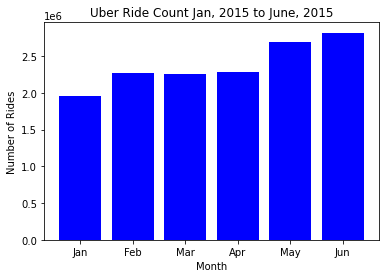

<Figure size 432x288 with 0 Axes>

In [91]:
month = sorted_temp_ride_df['month'].tolist()
ride_count = sorted_temp_ride_df['Number of rides'].tolist()
x_axis = np.arange(len(ride_count))
x_pos = [i for i, _ in enumerate(month)]
plt.bar(x_pos, ride_count, color='b', align="center")
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.title("Uber Ride Count Jan, 2015 to June, 2015")
plt.xticks(x_pos, month)

# Save fig
plt.savefig("../Images/Uber_Month.png")

# Show plot
plt.show()
# Resize plot to display labels
plt.tight_layout()

# Create a Scatter Plot for temperature vs Number of Uber rides

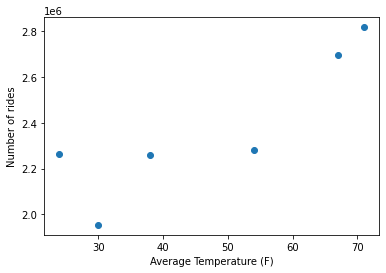

<Figure size 432x288 with 0 Axes>

In [92]:
y_values = sorted_temp_ride_df['Number of rides']
x_values = sorted_temp_ride_df["Average Temperature (F)"]
plt.scatter(x_values,y_values)
plt.xlabel('Average Temperature (F)')
plt.ylabel('Number of rides')
plt.show()

# Resize plot to display labels
plt.tight_layout()




1    2.134097e+06
2    2.049526e+06
3    2.246858e+06
4    2.472381e+06
5    2.655618e+06
6    2.711999e+06
Name: Average Temperature (F), dtype: float64
y = 14095.18x +1711241.09
The r-squared is: 0.7493756009772707


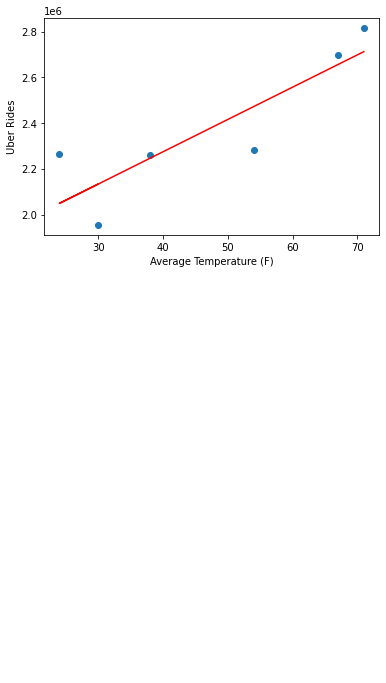

<Figure size 432x288 with 0 Axes>

In [93]:
# Perform a linear regression on temperature vs Number of Uber rides

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Average Temperature (F)')
plt.ylabel('Number of Rides')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save fig
plt.savefig("../Images/Uber_Temperature.png")

# Show plot
plt.show()

# Resize plot to display labels
plt.tight_layout()


# Observation from Temperature chart: Number of rides is positively correlated with temperature with r-square of 0.75

# Question2: Are there more uber rides in weekdays or weekends?

In [94]:
# Create a GroupBy object based upon "month"

weekday_group = uber_data.groupby("Weekday_Name")
weekday_group_df = weekday_group["locationID"].count()
weekday_group_df = weekday_group_df.reset_index()
weekday_group_df

,Weekday_Name,locationID
0,Friday,2282571
1,Monday,1694252
2,Saturday,2414563
3,Sunday,1952782
4,Thursday,2159598
5,Tuesday,1872902
6,Wednesday,1893811


In [95]:
days = {'Monday': 0, 'Tuesday':1, 'Wednesday': 3, 'Thursday': 4,'Friday': 5,'Saturday': 6,'Sunday': 7}

weekday_group_df['Weekday'] = weekday_group_df['Weekday_Name'].apply(lambda x: days[x])
weekday_group_df_s=weekday_group_df.sort_values(by='Weekday')
weekday_group_df_s=weekday_group_df_s.reset_index(drop=True)
weekday_group_df_s=weekday_group_df_s.rename(columns={"locationID": "Number of rides"})
weekday_group_df_s

,Weekday_Name,Number of rides,Weekday
0,Monday,1694252,0
1,Tuesday,1872902,1
2,Wednesday,1893811,3
3,Thursday,2159598,4
4,Friday,2282571,5
5,Saturday,2414563,6
6,Sunday,1952782,7


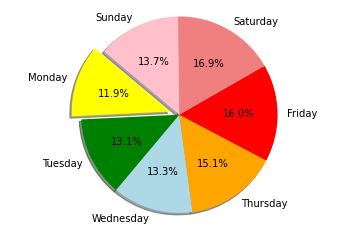

In [96]:
days = weekday_group_df_s['Weekday_Name'].tolist()
ride_count = weekday_group_df_s['Number of rides'].tolist()
colors = ["yellow","green","lightblue","orange","red","lightcoral","pink"]
explode = (0.1,0,0,0,0,0,0)
plt.pie(ride_count, explode=explode, labels=days, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/Uber_Day.png")
plt.show()

# Observation from Pie Chart: More number of rides from Thursday to Saturday. The count falls to weekday level on Sunday

# Question: What time of the day is busiest for Uber drivers on Weekdays vs Weekend?

In [123]:
weekday=['Monday','Tuesday','Wednesday','Thursday']
uber_data['weekday_ind']= np.where(uber_data['Weekday_Name'].isin(weekday),1,0)
uber_data['weekday_ind'].head()

0    1
1    1
2    1
3    1
4    1
Name: weekday_ind, dtype: int32

In [125]:
uber_data_weekday = uber_data.loc[uber_data['weekday_ind']==1]
uber_data_weekday.head(2)

,locationID,Ride_Date,year,month,day,hour,Weekday_Name,Year,Month,Average Temperature (F),Average Humidity,"Average Pressure (""Hg)",Weekday1_Ind,Weekday2_Ind,uber_data_weekend_ind,weekend_ind,weekday_ind
0,255,2015-01-01 00:00:05,2015,Jan,1,0,Thursday,2015,Jan,30,0.54,30.1,1,1,1,0,1
1,144,2015-01-01 00:00:05,2015,Jan,1,0,Thursday,2015,Jan,30,0.54,30.1,1,1,1,0,1


In [126]:
uber_data_weekday.shape

(7620563, 17)

In [127]:
# Create a GroupBy object based upon "hour"

hour_group_weekday = uber_data_weekday.groupby("hour")
hour_group_weekday_df = hour_group_weekday["locationID"].count()
hour_group_weekday_df = hour_group_weekday_df.reset_index()
hour_group_weekday_df=hour_group_weekday_df.rename(columns={"locationID": "Number of rides"})
hour_group_weekday_df

,hour,Number of rides
0,0,213479
1,1,118641
2,2,73050
3,3,52524
4,4,70246
5,5,111055
6,6,189825
7,7,309725
8,8,404422
9,9,385161


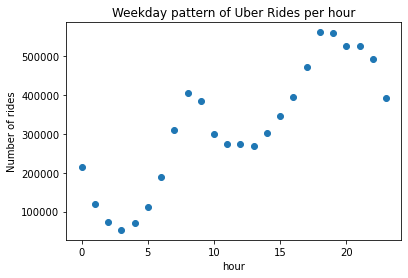

<Figure size 432x288 with 0 Axes>

In [132]:
# Create a Scatter Plot for hour vs Number of Uber rides

y_values = hour_group_weekday_df['Number of rides']
x_values = hour_group_weekday_df["hour"]
plt.scatter(x_values,y_values)
plt.xlabel('hour')
plt.ylabel('Number of rides')
plt.title('Weekday pattern of Uber Rides per hour')
plt.show()

# Resize plot to display labels
plt.tight_layout()

0      93575.323333
1     113049.074203
2     132522.825072
3     151996.575942
4     171470.326812
5     190944.077681
6     210417.828551
7     229891.579420
8     249365.330290
9     268839.081159
10    288312.832029
11    307786.582899
12    327260.333768
13    346734.084638
14    366207.835507
15    385681.586377
16    405155.337246
17    424629.088116
18    444102.838986
19    463576.589855
20    483050.340725
21    502524.091594
22    521997.842464
23    541471.593333
Name: hour, dtype: float64
y = 19473.75x +93575.32
The r-squared is: 0.7368833189193736


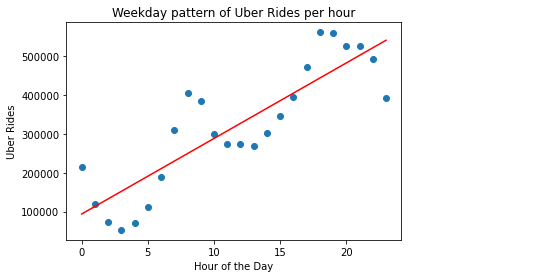

<Figure size 432x288 with 0 Axes>

In [134]:
# Perform a linear regression on hour vs Number of Uber rides

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Hour of the Day')
plt.ylabel('Uber Rides')
plt.title('Weekday pattern of Uber Rides per hour')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save fig
plt.savefig("../Images/Weekday_Uber_Hour.png")

# Show plot
plt.show()

# Resize plot to display labels
plt.tight_layout()

# Observation from Weekday Hour Scatter Plot: Number of rides increase between 7 am to 10 am. Then rise again from 4 pm to 8 pm.

# Weekend Hour

In [116]:
weekend=['Friday','Saturday']
uber_data['weekend_ind']= np.where(uber_data['Weekday_Name'].isin(weekend),1,0)
uber_data['weekend_ind'].head()

0    0
1    0
2    0
3    0
4    0
Name: weekend_ind, dtype: int32

In [122]:
uber_data_weekend = uber_data.loc[uber_data['weekend_ind']==1]
uber_data_weekend.head(2)

,locationID,Ride_Date,year,month,day,hour,Weekday_Name,Year,Month,Average Temperature (F),Average Humidity,"Average Pressure (""Hg)",Weekday1_Ind,Weekday2_Ind,uber_data_weekend_ind,weekend_ind
58045,138,2015-01-02 00:00:04,2015,Jan,2,0,Friday,2015,Jan,30,0.54,30.1,1,0,1,1
58046,34,2015-01-02 00:00:04,2015,Jan,2,0,Friday,2015,Jan,30,0.54,30.1,1,0,1,1


In [118]:
uber_data_weekend.shape

(4697134, 16)

In [136]:
# Create a GroupBy object based upon "hour"

hour_group_weekend = uber_data_weekend.groupby("hour")
hour_group_weekend_df = hour_group_weekend["locationID"].count()
hour_group_weekend_df = hour_group_weekend_df.reset_index()
hour_group_weekend_df=hour_group_weekend_df.rename(columns={"locationID": "Number of rides"})
hour_group_weekend_df

,hour,Number of rides
0,0,231750
1,1,150305
2,2,100052
3,3,69411
4,4,60761
5,5,56674
6,6,75429
7,7,108525
8,8,144881
9,9,160598


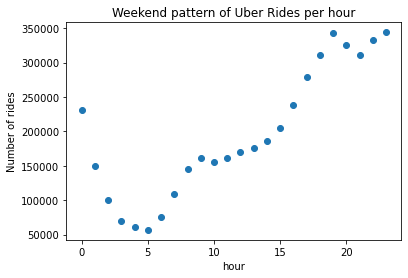

<Figure size 432x288 with 0 Axes>

In [137]:
# Create a Scatter Plot for hour vs Number of Uber rides in Weekend

y_values = hour_group_weekend_df['Number of rides']
x_values = hour_group_weekend_df["hour"]
plt.scatter(x_values,y_values)
plt.xlabel('hour')
plt.ylabel('Number of rides')
plt.title('Weekend pattern of Uber Rides per hour')
plt.show()

# Resize plot to display labels
plt.tight_layout()

0      63995.026667
1      75448.843188
2      86902.659710
3      98356.476232
4     109810.292754
5     121264.109275
6     132717.925797
7     144171.742319
8     155625.558841
9     167079.375362
10    178533.191884
11    189987.008406
12    201440.824928
13    212894.641449
14    224348.457971
15    235802.274493
16    247256.091014
17    258709.907536
18    270163.724058
19    281617.540580
20    293071.357101
21    304525.173623
22    315978.990145
23    327432.806667
Name: hour, dtype: float64
y = 11453.82x +63995.03
The r-squared is: 0.7161294638207699


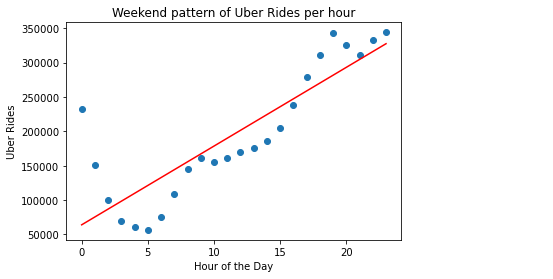

<Figure size 432x288 with 0 Axes>

In [138]:
# Perform a linear regression on hour vs Number of Uber rides

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Hour of the Day')
plt.ylabel('Uber Rides')
plt.title('Weekend pattern of Uber Rides per hour')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save fig
plt.savefig("../Images/Uber_Hour.png")

# Show plot
plt.show()

# Resize plot to display labels
plt.tight_layout()

# Observation Weekend Hour Chart: Number of rides peak around 7 pm. Then start to rise again after 4 pm and peak at 7 pm.